In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


In [6]:
def direction(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - ((c[0] - a[0]) * (b[1] - a[1]))

def distance_squared(point1, point2):
    return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

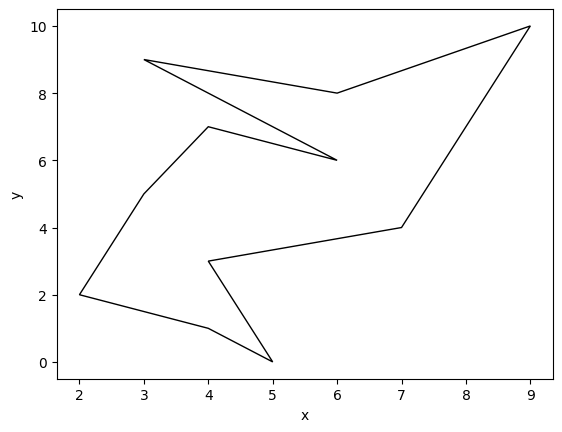

In [7]:
draw_polygon(polygon_example_2)

Do tego celu wygeneruj wielokąt.

In [8]:
polygon = polygon_example_1

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [9]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    for i in range(0, len(polygon)-1):
        if connective_or_separative(polygon[i-1], polygon[i], polygon[i+1]):
            return False
    
    if connective_or_separative(polygon[-2], polygon[-1], polygon[0]):
        return False
    return True

def connective_or_separative(a, b, c, eps = 10 ** (-12)):
    determinant = direction(a, b, c)
    if a[1] > b[1] and c[1] > b[1] and determinant < -eps:
        return True
    elif a[1] < b[1] and c[1] < b[1] and determinant < -eps:
        return True
    return False
    
def is_less(polygon, i, j, ind):
    return ((polygon[i][ind] < polygon[j][ind]) or (polygon[i][ind] == polygon[j][ind] and i < j))

Przeprowadź test poprawności powyższej funkcji.

In [10]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Sprawdź monotoniczność swojego wielokątu.

In [135]:
is_y_monotonic(polygon)

True

***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

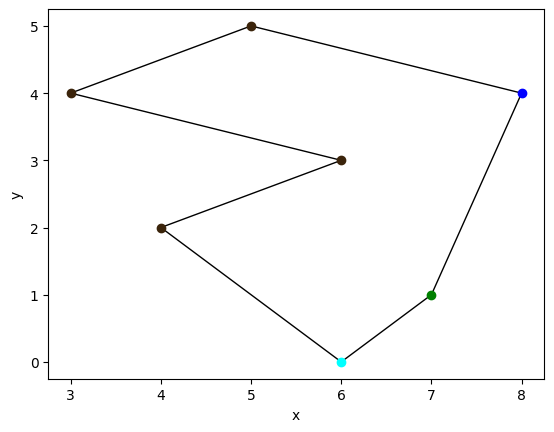

In [20]:
draw_polygon_colors(polygon_example_1,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [13]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    eps = 0
    n = len(polygon)
    res = []

    for i in range(n):
        a = polygon[i-1]
        b = polygon[i]
        c = polygon[(i+1)%n]
        if a[1] < b[1] and c[1] < b[1]:

            # starting
            if direction(a, b, c) > eps:
                res.append(0)

            # separative
            elif direction(a, b, c) < -eps:
                res.append(3)

        # closing or connective or correct
        elif a[1] > b[1] and c[1] > b[1]:
            # closing
            if direction(a, b, c) > eps:
                res.append(1)
            # connective
            elif direction(a, b, c) < -eps:
                res.append(2)

    # correct
        else:
            res.append(4)

    
    return res

def get_angle(a,b,c):
    return

Przeprowadź test poprawności powyższej funkcji. 

In [14]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

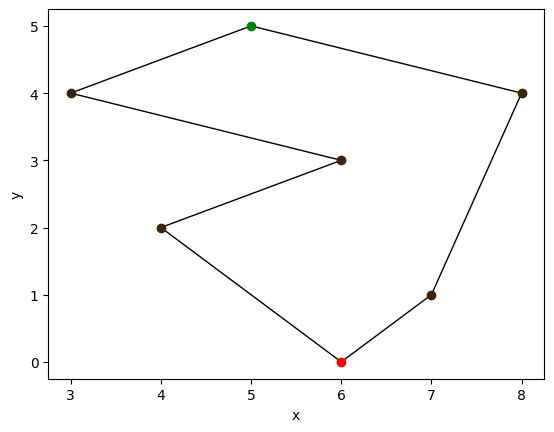

In [15]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

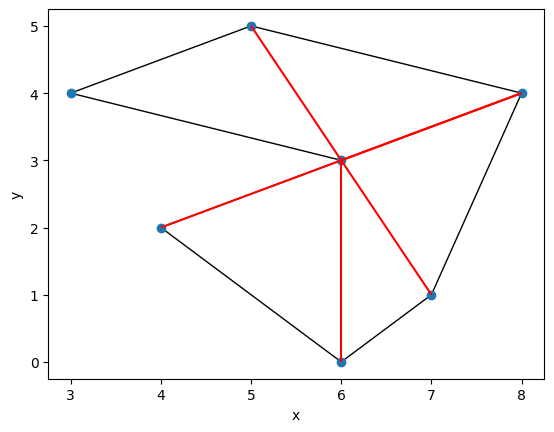

In [16]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [88]:
def separate_chains(polygon):
    n = len(polygon)
    chain = [False for i in range(n)]
    
    ind_y = polygon.index(max(polygon, key = lambda point: point[1]))
    chain[ind_y] = True
    c = 0
    while c < n:
        if polygon[(ind_y + c)%n][1] <= polygon[(ind_y-1 + c) % n][1]:
            chain[(ind_y + c) % n] = True
        c+=1

    
    return chain

separate_chains(polygon_example_1)

[True, True, True, True, True, False, False]

In [123]:
def neighbours(a, b, list):
    a_index = list.index(a)
    b_index = list.index(b)
    if abs(a_index - b_index) == 1:
        return True
    elif abs(a_index - b_index) == len(list) - 1:
        return True
    return False

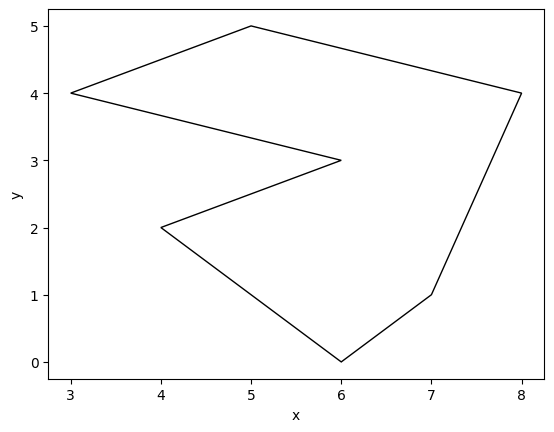

In [89]:
draw_polygon(polygon_example_1)

In [134]:
polygon_example_1

[(5, 5), (3, 4), (6, 3), (4, 2), (6, 0), (7, 1), (8, 4)]

In [192]:
def triangulation(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

    if not is_y_monotonic(polygon):

        return
    
    res = []
    n = len(polygon)
    eps = 0

    s_polygon = sorted(polygon, key = lambda x: x[1], reverse=True)
    classification = color_vertex(polygon)
    stack = [s_polygon[0], s_polygon[1]]
    chain = separate_chains(polygon)
    # print(stack, s_polygon)
    # print(s_polygon)
    # print(stack)
    # print(chain)

    for i in range(2, n):
        if chain[polygon.index(stack[-1])] == chain[polygon.index(s_polygon[i])]:
            stack.append(s_polygon[i])

            while len(stack) > 2:
                if polygon.index(s_polygon[i]) and direction(stack[-3], stack[-2], stack[-1]) < eps:
                    break
                if not polygon.index(s_polygon[i]) and direction(stack[-3], stack[-2], stack[-1]) > eps:
                    break
                if not neighbours(stack[-1], stack[-3], polygon): res.append([stack[-1], stack[-3]])

                p = stack.pop()
                stack.pop()
                stack.append(p)
        
        else:
            while len(stack) > 0:
                p = stack.pop()
                if neighbours(p, s_polygon[i], polygon): continue
                res.append([p, s_polygon[i]])

            stack.append(s_polygon[i-1])
            stack.append(s_polygon[i])

    # res = [[polygon.index(r[0]), polygon.index(r[1])] for r in res]
    return res

In [155]:
print(polygon_example_1)
triangulation(polygon_example_1)

[(5, 5), (3, 4), (6, 3), (4, 2), (6, 0), (7, 1), (8, 4)]
[(5, 5), (3, 4), (8, 4), (6, 3), (4, 2), (7, 1), (6, 0)]
[(5, 5), (3, 4)]
[True, True, True, True, True, False, False]


[[(3, 4), (8, 4)], [(8, 4), (6, 3)], [(4, 2), (8, 4)], [(4, 2), (7, 1)]]

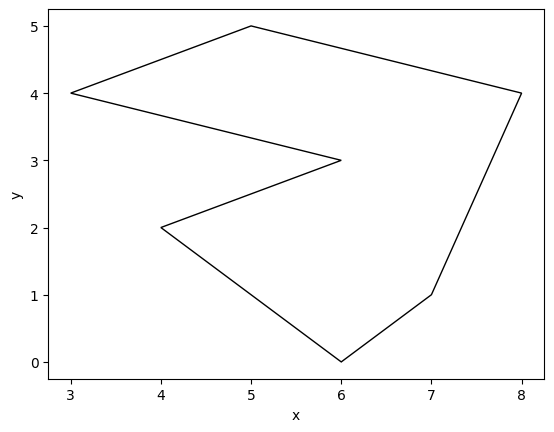

In [156]:
draw_polygon(polygon_example_1)

In [190]:
pol = [(0.030693547033494514, -0.0404187105216232),
(0.008516127678655797, 0.0360825149685729),
(0.0003104825173654846, 0.014850897321514067),
(-0.01410484006327968, -0.0016625830706427924),
(-0.03384274328908614, -0.01446895561966241),
(-0.04493145296650549, -0.0188500830706428)] 

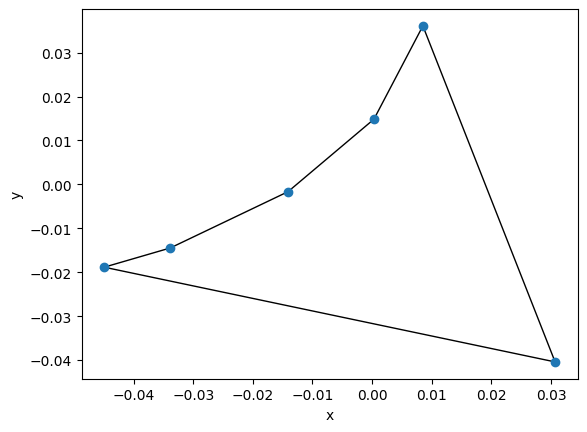

In [193]:
draw_polygon_tri(pol, triangulation(pol))

In [169]:
triangulation(pol)

[(4, 5), (3, 4), (2, 3.5), (1.5, 3.3), (1, 3.2), (5, 1)]
[(4, 5), (3, 4)]
[True, True, True, True, True, True]


[[(5, 1), (1.5, 3.3)], [(5, 1), (2, 3.5)], [(5, 1), (3, 4)], [(5, 1), (4, 5)]]

[(5, 5), (3, 4), (8, 4), (6, 3), (4, 2), (7, 1), (6, 0)]
[(5, 5), (3, 4)]
[True, True, True, True, True, False, False]


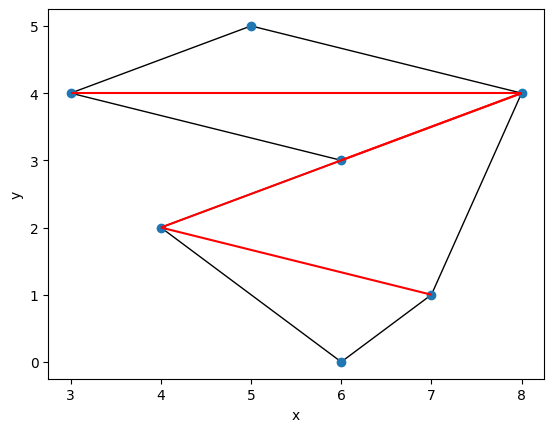

In [145]:
draw_polygon_tri(polygon_example_1, triangulation(polygon_example_1))

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [189]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: WRONG ANSWER
		Output:   []
		Expected: [[0, 2], [0, 4], [0, 3]]
	Test 2: Passed
	Test 3: Passed
	Test 4: WRONG ANSWER
		Output:   [[3, 6], [4, 6], [6, 2], [1, 7], [2, 7], [7, 0], [0, 8]]
		Expected: [[3, 5], [3, 6], [2, 6], [1, 6], [7, 1], [0, 7], [8, 0]]
	Test 5: Passed
	Test 6: WRONG ANSWER
		Output:   [[4, 6], [2, 4], [1, 8], [2, 8], [4, 8], [6, 8]]
		Expected: [[5, 7], [3, 5], [3, 7], [1, 3], [1, 7], [8, 1]]
	Test 7: Passed
	Test 8: WRONG ANSWER
		Output:   [[2, 4], [1, 6], [2, 6], [4, 6]]
		Expected: [[5, 3], [1, 3], [6, 1], [6, 3]]
	Test 9: Passed
	Test 10: Passed
Result: 6/10
Time: 0.003s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [ ]:
tri = triangulation(polygon)
draw_polygon_tri(polygon,tri)